# 1. Extract iris dataset from the repository. Convert the class label in to one hot encoding representation. Hence, class label column will have 3 columns with binary representation. Implement the following without using built in python libraries except numpy. 
# (i) Count the number of occurrences of each class labels.
# (ii) Use dot product with one hot encoded class label to add values of each attribute with respect to
# corresponding class label and find the mean.
# (ii) In the same context of (ii) find the variance.
 [ Variance = squareroot (sum of squares of the total / n) ]


In [1]:
import numpy as np

# Load the iris dataset from a CSV file
data = np.genfromtxt('iris.csv', delimiter=',', skip_header=1)

# Separate the attributes and class labels
attributes = data[:, :4]
class_labels = data[:, 4]


In [2]:
# Convert class labels to one-hot encoding
num_classes = 3
one_hot_labels = np.eye(num_classes)[class_labels.astype(int)]

In [3]:
# Count the number of occurrences of each class label
class_counts = np.sum(one_hot_labels, axis=0)

In [4]:
# Calculate the mean of each attribute for each class
class_means = np.dot(attributes.T, one_hot_labels) / class_counts

In [5]:
# Reshape class counts array
class_counts = class_counts.reshape(-1, 1)

# Calculate the variance for each attribute with respect to each class
attribute_variance = np.sqrt(np.sum((attributes[:, np.newaxis, :] - class_means.T)**2, axis=0) / class_counts)


In [6]:
print("Class Counts:", class_counts)
print("Class Means:\n", class_means)
print("Attribute Variance:\n", attribute_variance)

Class Counts: [[50.]
 [71.]
 [29.]]
Class Means:
 [[ 25.5         90.22535211 125.65517241]
 [  5.006        6.05492958   6.76896552]
 [  3.418        2.77605634   3.10689655]
 [  1.464        4.57464789   5.71724138]]
Attribute Variance:
 [[114.56330128   2.03635655   0.97864192   5.00737057]
 [ 66.47703185   1.23837853   0.74682899   2.8177944 ]
 [150.69593706   2.82041556   0.99016381   5.98638101]]


# 2. Implement a Support Vector Machine for the dataset of your interest and plot the graph with data points, margin, hyperplane and the indication of support vectors. Calculate precision, recall, f1-measure and ROC curve.

In [7]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print (data.feature_names)
print (data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [8]:
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
#since our dataset has no null values so no need to perform preprocessing and also we have the mean values as column in our data
#no need to calculate mean aslo as

In [12]:
# Our dataset already contains the mean values of all the columns

#in our dataset columns fro 1 to 10 has the means value

In [13]:
featureMeans = list(df.columns[1:11])

In [14]:
print(featureMeans)

['mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error']


In [15]:
df[1:11]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,0


In [16]:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [17]:
df.to_csv('load_breast_cancer.csv', sep=',', index=False)

In [18]:
X = df.iloc[:,1:30].values
y = df.iloc[:,30].values

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [20]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 0)

In [21]:
model.fit(X_train, y_train)
y_predict=model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)
accuracy_score(y_test,y_predict)

[[22  0]
 [ 2 33]]


0.9649122807017544

In [23]:
svc = SVC(kernel='poly')

svc.fit(X_train, y_train)

SVC(kernel='poly')

In [24]:
y_predict=svc.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)
accuracy_score(y_test,y_predict)

[[17  5]
 [ 1 34]]


0.8947368421052632

Text(0.5, 1.0, 'Confusion matrix of linear SVM')

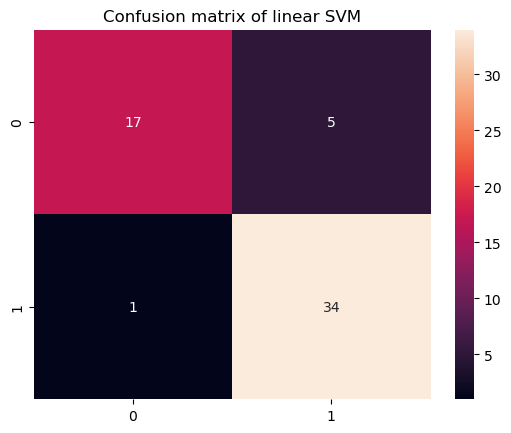

In [26]:
import seaborn as sns
#confusion_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(confusion_matrix, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') 

In [27]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        22
           1       0.87      0.97      0.92        35

    accuracy                           0.89        57
   macro avg       0.91      0.87      0.88        57
weighted avg       0.90      0.89      0.89        57



In [28]:
model = SVC(kernel = 'rbf')

model.fit(X_train, y_train)


SVC()

In [29]:
y_predict=model.predict(X_test)

In [30]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)
accuracy_score(y_test,y_predict)

[[19  3]
 [ 1 34]]


0.9298245614035088

Text(0.5, 1.0, 'Confusion matrix of linear SVM')

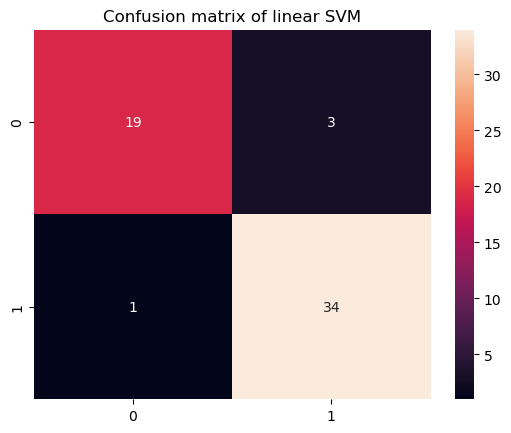

In [31]:
sns.heatmap(confusion_matrix, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') 

In [32]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.92      0.97      0.94        35

    accuracy                           0.93        57
   macro avg       0.93      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



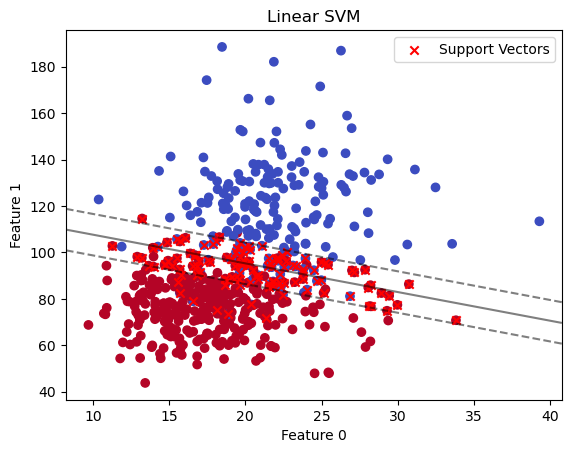

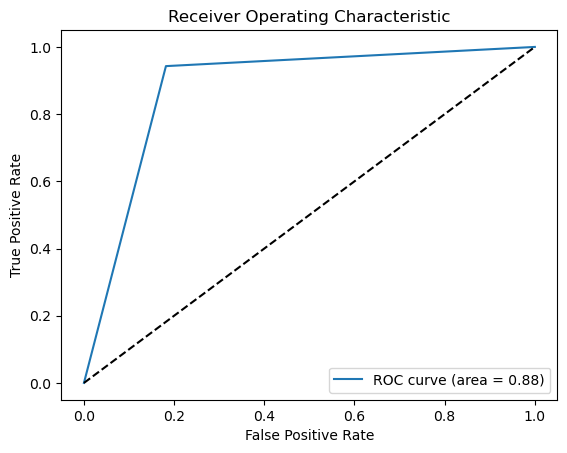

Evaluation metrics for linear SVM:
Accuracy: 0.8947368421052632
Precision: 0.8918918918918919
Recall: 0.9428571428571428
F1-measure: 0.9166666666666667

Evaluation metrics for polynomial SVM:
Accuracy: 0.8947368421052632
Precision: 0.8918918918918919
Recall: 0.9428571428571428
F1-measure: 0.9166666666666667

Evaluation metrics for RBF SVM:
Accuracy: 0.8771929824561403
Precision: 0.868421052631579
Recall: 0.9428571428571428
F1-measure: 0.904109589041096



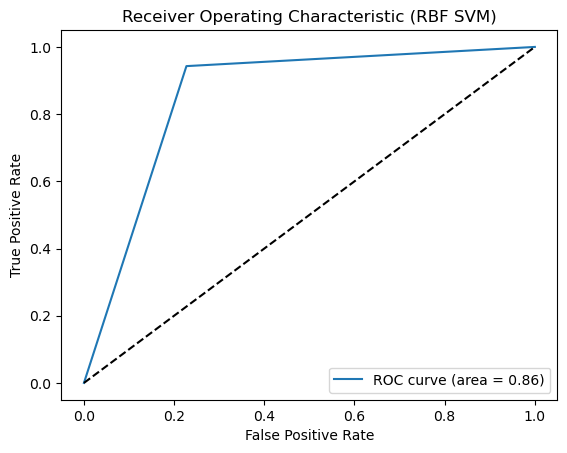

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve, auc

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

X = df.iloc[:, 1:30].values
y = df.iloc[:, 30].values

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Apply linear SVM on the training dataset
model = SVC(kernel='linear', random_state=0)
model.fit(X_train[:, :2], y_train)  # Consider only the first two features

# Make predictions on the test dataset
y_predict = model.predict(X_test[:, :2])  # Consider only the first two features

# Display the accuracy and confusion matrix of the evaluated model on the test data
confusion_matrix_linear = confusion_matrix(y_test, y_predict)
accuracy_linear = accuracy_score(y_test, y_predict)

# Plot the graph with data points, margin, hyperplane, and indication of support vectors
support_vectors = model.support_vectors_
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', label='Support Vectors')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Plotting the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.title('Linear SVM')
plt.legend()
plt.show()

# Calculate precision, recall, and F1-measure
precision_linear = precision_score(y_test, y_predict)
recall_linear = recall_score(y_test, y_predict)
f1_linear = f1_score(y_test, y_predict)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Apply SVM on the training dataset using polynomial kernel
model_poly = SVC(kernel='poly', random_state=0)
model_poly.fit(X_train[:, :2], y_train)  # Consider only the first two features

# Make predictions on the test dataset using polynomial kernel
y_predict_poly = model_poly.predict(X_test[:, :2])  # Consider only the first two features

# Display the accuracy and confusion matrix of the evaluated model on the test data with polynomial kernel
confusion_matrix_poly = confusion_matrix(y_test, y_predict_poly)
accuracy_poly = accuracy_score(y_test, y_predict_poly)

# Calculate precision, recall, and F1-measure for polynomial SVM
precision_poly = precision_score(y_test, y_predict_poly)
recall_poly = recall_score(y_test, y_predict_poly)
f1_poly = f1_score(y_test, y_predict_poly)

# Apply SVM on the training dataset using RBF kernel
model_rbf = SVC(kernel='rbf', random_state=0)
model_rbf.fit(X_train[:, :2], y_train)  # Consider only the first two features

# Make predictions on the test dataset using RBF kernel
y_predict_rbf = model_rbf.predict(X_test[:, :2])  # Consider only the first two features

# Display the accuracy and confusion matrix of the evaluated model on the test data with RBF kernel
confusion_matrix_rbf = confusion_matrix(y_test, y_predict_rbf)
accuracy_rbf = accuracy_score(y_test, y_predict_rbf)

# Calculate precision, recall, and F1-measure for RBF SVM
precision_rbf = precision_score(y_test, y_predict_rbf)
recall_rbf = recall_score(y_test, y_predict_rbf)
f1_rbf = f1_score(y_test, y_predict_rbf)

# Print the evaluation metrics
print("Evaluation metrics for linear SVM:")
print("Accuracy:", accuracy_linear)
print("Precision:", precision_linear)
print("Recall:", recall_linear)
print("F1-measure:", f1_linear)
print()

print("Evaluation metrics for polynomial SVM:")
print("Accuracy:", accuracy_poly)
print("Precision:", precision_poly)
print("Recall:", recall_poly)
print("F1-measure:", f1_poly)
print()

print("Evaluation metrics for RBF SVM:")
print("Accuracy:", accuracy_rbf)
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)
print("F1-measure:", f1_rbf)
print()

# Plot the ROC curve for RBF SVM
fpr_rbf, tpr_rbf, thresholds_rbf = roc_curve(y_test, y_predict_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

plt.plot(fpr_rbf, tpr_rbf, label='ROC curve (area = %0.2f)' % roc_auc_rbf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RBF SVM)')
plt.legend(loc='lower right')
plt.show()
